# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2021
## Дополнительное домашнее задание 1. Байесовские оценки и АБ тестирование
### Дедлайн --- 21 декабря 9:00


In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import colors
import seaborn as sns

from scipy import stats as sps
sns.set(style="darkgrid", font_scale=1.2)

## Задача 1 (20 баллов)

Байесовская оценка для распределения Бернулли то есть бета-распределение.

а) Оценка параметра 

Сгенерируйте выборки из распределения Бернулли размера $200$ с параметрами $0.3,\ 0.5,\ 0.9$. 

In [2]:
SAMPLE_SIZE = 200

thetas = [0.3, 0.5, 0.9]

bern_samples = sps.bernoulli(thetas).rvs(size=(SAMPLE_SIZE, len(thetas))).T

Реализуйте метод `get_estimator` класса `BayesEstimator` который возвращает байесовскую оценку (распределения) для данной выборки. Учтите что в `__init__` указаны параметры априорного распределения.

In [3]:
class BayesEstimator:
    def __init__(self, prior_alpha: float = 1, prior_beta: float = 1):
        self._prior_alpha = prior_alpha
        self._prior_beta = prior_beta

    def get_estimator(self, sample: np.ndarray):
        N = sample.shape[0]
        alpha = np.sum(sample) + self._prior_alpha
        beta = N - np.sum(sample) + self._prior_beta
        posterior = sps.beta(alpha, beta)
        return posterior

Для каждой выборки создайте свой экземпляр класса `BayesEstimator`. Для каждого $n \leq 200$ постройте график плотности апостериорного распределения соответствующего цвета. Также зафиксируйте среднее и $\alpha/2$ и $(1 - \alpha/2)$ квантили, $\alpha=0.05$ для всех вышеупомянутых $n$. Они вам понадобятся в следующем пункте.

In [4]:
means = np.zeros((3, SAMPLE_SIZE))
lower_bound = np.zeros((3, SAMPLE_SIZE))
upper_bound = np.zeros((3, SAMPLE_SIZE))
alpha = 0.05

In [5]:
import warnings
warnings.filterwarnings('ignore')

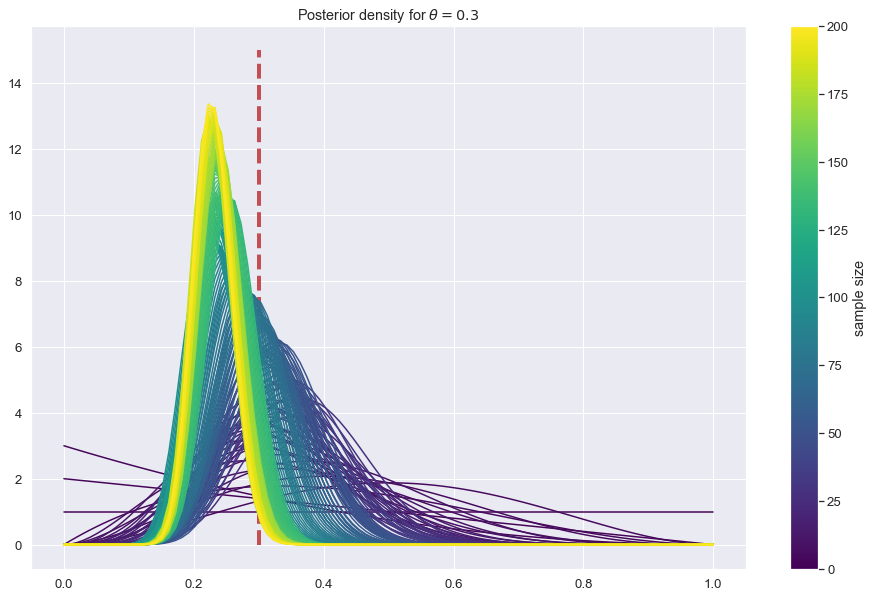

In [6]:
x = np.linspace(0, 1, 100)

palette = sns.color_palette("viridis", n_colors=SAMPLE_SIZE)
plt.figure(figsize=(16, 10))
be = BayesEstimator()
for i in range(bern_samples.shape[-1]):
    estimator = be.get_estimator(bern_samples[0][:i])
    quantiles = estimator.ppf((alpha / 2, 1 - alpha / 2))
    lower_bound[0][i] = np.min(quantiles)
    upper_bound[0][i] = np.max(quantiles)
    post_sample = estimator.rvs(size=i+1)
    means[0][i] = np.mean(post_sample)
    sns.lineplot(x=x, y=estimator.pdf(x), color=palette[i])

norm = colors.Normalize(0, SAMPLE_SIZE)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap="viridis"), label="sample size")
plt.title(r"Posterior density for $\theta = 0.3$")
plt.vlines(0.3, 0, 15, linestyle="dashed", colors="r", linewidth=4)
plt.show()

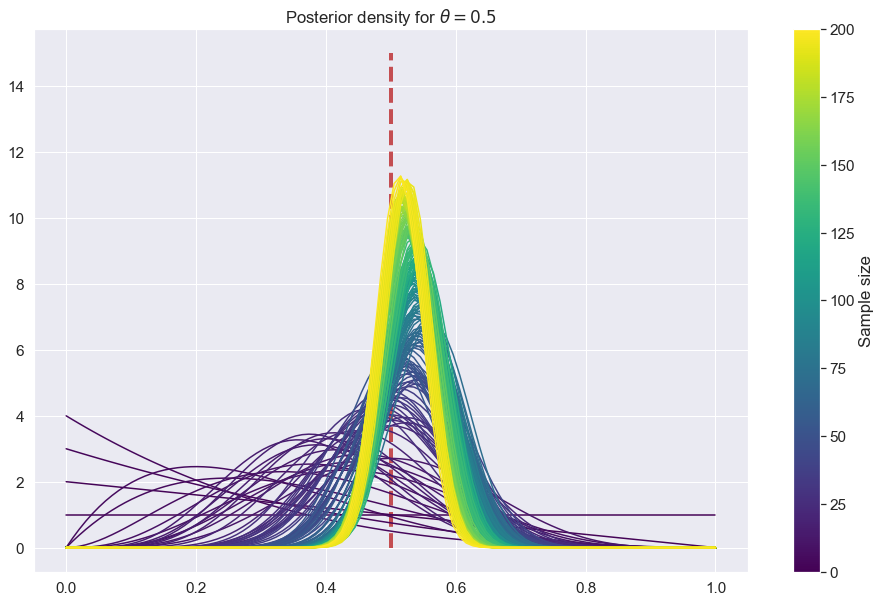

In [7]:
x = np.linspace(0, 1, 100)
sns.set(style="darkgrid", font_scale=1.4)
palette = sns.color_palette("viridis", n_colors=SAMPLE_SIZE)
plt.figure(figsize=(16, 10))
be = BayesEstimator()
for i in range(bern_samples.shape[-1]):
    estimator = be.get_estimator(bern_samples[1][:i])
    quantiles = estimator.ppf((alpha / 2, 1 - alpha / 2))
    lower_bound[1][i] = np.min(quantiles)
    upper_bound[1][i] = np.max(quantiles)
    post_sample = estimator.rvs(size=i+1)
    means[1][i] = np.mean(post_sample)
    sns.lineplot(x=x, y=estimator.pdf(x), color=palette[i])
norm = colors.Normalize(0, SAMPLE_SIZE)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap="viridis"), label="Sample size")
plt.title(r"Posterior density for $\theta = 0.5$")
plt.vlines(0.5, 0, 15, linestyle="dashed", colors="r", linewidth=4)
plt.show()

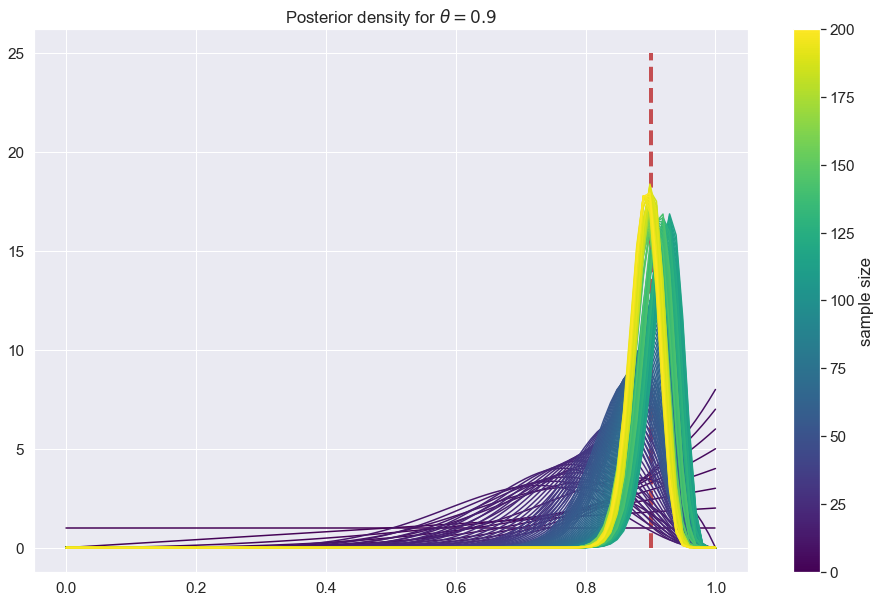

In [8]:
x = np.linspace(0, 1, 100)
sns.set(style="darkgrid", font_scale=1.4)
palette = sns.color_palette("viridis", n_colors=SAMPLE_SIZE)
plt.figure(figsize=(16, 10))
be = BayesEstimator()
for i in range(bern_samples.shape[-1]):
    estimator = be.get_estimator(bern_samples[2][:i])
    quantiles = estimator.ppf((alpha / 2, 1 - alpha / 2))
    lower_bound[2][i] = np.min(quantiles)
    upper_bound[2][i] = np.max(quantiles)
    post_sample = estimator.rvs(size=i+1)
    means[2][i] = np.mean(post_sample)
    sns.lineplot(x=x, y=estimator.pdf(x), color=palette[i])
norm = colors.Normalize(0, SAMPLE_SIZE)

plt.colorbar(cm.ScalarMappable(norm=norm, cmap="viridis"), label="sample size")
plt.title(r"Posterior density for $\theta = 0.9$")
plt.vlines(0.9, 0, 25, linestyle="dashed", colors="r", linewidth=4)
plt.show()

Постройте график среднего для апостериорного распределения и 95% доверительный интервал для всех выборок в зависимости от $n$ (каждая выборка своим цветом). Интервал для какой выборки почти для всех $n$ самый узкий? С чем это связано?

**Ответ:**

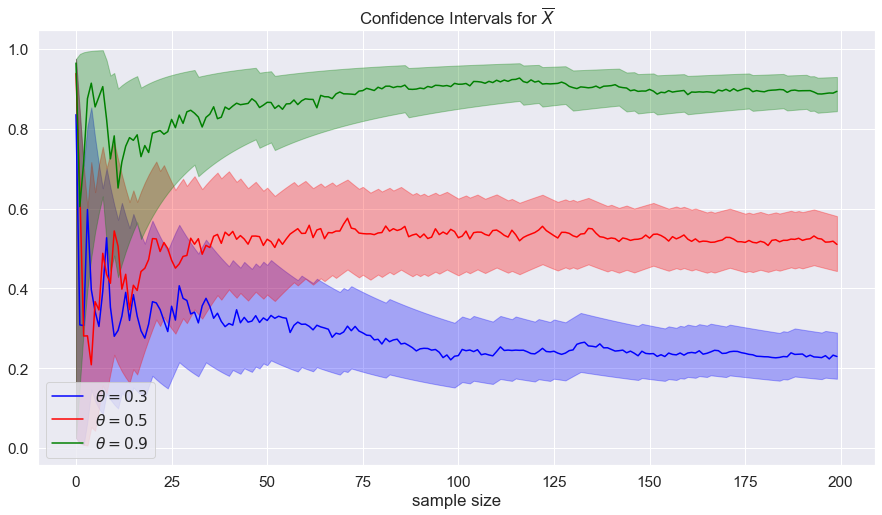

In [9]:
plt.figure(figsize=(15, 8))
sample_sizes = np.arange(SAMPLE_SIZE)

colors = ["blue", "red", "green"]

for i in range(len(thetas)):
    sns.lineplot(x=sample_sizes, y=means[i], color=colors[i], label=f"$\\theta={thetas[i]}$")
    plt.fill_between(x=sample_sizes, y1=lower_bound[i], y2=upper_bound[i], color=colors[i], alpha=0.3)
plt.title("Confidence Intervals for $\overline{X}$")
plt.xlabel("sample size")
plt.show()

__Answer:__ при $\theta=0.9$ получаются узкие ДИ при всех `n`. А это следует из графика плотностей, где мы можем заметить что при любом `n` там графики плотностей намного уже чем при других значениях $\theta$. А значит и квантили $u_{1 - alpha/2}$ и $u_{alpha/2}$ бета распределения находятся достаточно близко друг к другу.

б) Раздающий на экзамене.

Представьте, что вы раздающий на экзамене который принимают два преподавателя. Так уж случилось, что вы знаете все оценки, которые ставят преподаватели. У каждого из преподавателей есть плохое и хорошее настроение, которое может внезапно меняться (заранее предугадать нельзя). Настроение находится в интервале $(0;1)$ и является вероятности поставить положительную оценку. Ваша задача выбрать к какому из преподавателей направлять студентов каждый раз. Считаем, что студент может получить только положительную оценку (1) или отрицательную (0). Считаем, что вы добрый раздающий и что если один или больше из преподавателей сидит без дела, то это нормально. 

In [10]:
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)


class Professor:
    def __init__(self, mood=0.5):
        self.mood = mood

    def step(self) -> int:
        return sps.bernoulli(self.mood).rvs()

In [11]:
np.random.seed(42)
professors = [Professor(mood=sps.uniform().rvs()) for i in range(10)]

Итак, будем считать, что у нас есть 1000 студентов (для более точного подсчета). 
Начнем с простого. Давайте попробуем случайно распределять студентов.

In [12]:
alphas = np.ones(10)
betas = np.ones(10)

num_students = 10000

cum_retakes_random = []

for i in range(num_students):
    idx = np.random.randint(10)
    cur_est = professors[idx].step()
    if cur_est == 1:
        alphas[idx] += 1
    else:
        betas[idx] += 1
    cum_retakes_random.append(betas.sum() - 10)
        
print(f"Вероятность сдать: {(alphas.sum() - 10)/num_students}")

Вероятность сдать: 0.5181


Давайте попробуем улучшить наш алгоритм. Будем брать случайного преподавателя с вероятностью $\varepsilon$, а с вероятностью $(1-\varepsilon)$ выбирать преподавателя, который с наибольшей вероятностью поставит студенту положительную оценку на текущий момент.

![](https://i.ibb.co/nPDLfJ2/2020-11-16-19-16-11.png)

Для нас $r_t \in \{0;1\}$ -- результат экзамена.

In [13]:
eps=0.05

alphas = np.ones(10)
betas = np.ones(10)

num_students = 10000

cum_retakes_greedy = []

for i in range(num_students):
    choose_random = sps.bernoulli(p=eps).rvs()
    if choose_random == 1:
        idx = np.random.randint(10)
        cur_est = professors[idx].step()
    else:
        theta = alphas / (alphas + betas)
        idx = np.argmax(theta)
        cur_est = professors[idx].step()
    if cur_est == 1:
        alphas[idx] += 1
    else:
        betas[idx] += 1
    cum_retakes_greedy.append(betas.sum() - 10)

print(f"Вероятность сдать: {(alphas.sum() - 10)/num_students}")

Вероятность сдать: 0.9309


Теперь давайте попробуем поступать следующим образом. Для каждого принимающего будем хранить апостериорное распрееления (в виде параметров $\alpha$ и $\beta$ для бета-распределения). На каждой из итераций будем сэмплировать одно число из этих распределений и выберем преподователя с максимальным засэмплированым числом.

Подробнее:

![](https://i.ibb.co/HC2rXHm/2020-11-16-19-12-29.png)



In [14]:
alphas = np.ones(10)
betas = np.ones(10)

cum_retakes_bayes = []

for i in range(num_students):
    theta = sps.beta(alphas, betas).rvs()
    idx = np.argmax(theta)
    cur_est = professors[idx].step()
    if cur_est == 1:
        alphas[idx] += 1
    else:
        betas[idx] += 1
    cum_retakes_bayes.append(betas.sum() - 10)
        
print((alphas.sum() - 10)/num_students)

0.9475


Постройте график в котором по оси $x$ отложено число студентов (число наблюдений), а по оси $y$ число пересдач на момент, соотвтствующий числу наблюдений.

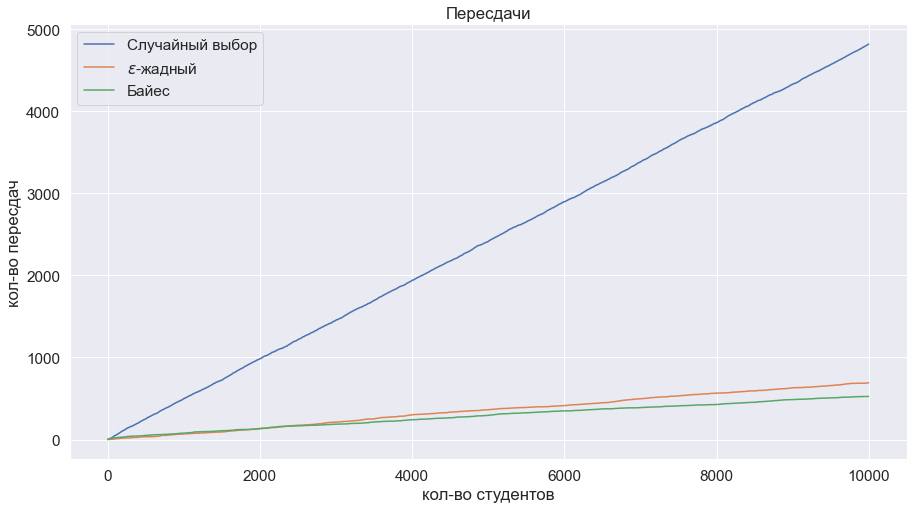

In [15]:
plt.figure(figsize=(15, 8))
sizes = np.arange(num_students)
sns.lineplot(x=sizes, y=cum_retakes_random, label="Случайный выбор")
sns.lineplot(x=sizes, y=cum_retakes_greedy, label="$\\varepsilon$-жадный")
sns.lineplot(x=sizes, y=cum_retakes_bayes, label="Байес")
plt.title("Пересдачи")
plt.xlabel("кол-во студентов")
plt.ylabel("кол-во пересдач")
plt.show()

Какая стратегия проявила себя лучше остальных? Как вы думаете, почему? Какую стратегию стоит выбирать в зависимости от числа наблюдений (если у нас 10, 50, 100, 1000 студентов)? Постройте графики с соответсвующими `plt.xlim` чтобы ответить на этот вопрос.

**Ответ:** как видим, при маленьких значениях кол-ва студентов жадный алгоритм лучше всех работает. А с какого-то момента байесовский подход становится лучше. Так же можно заметить, что если бы эпсилон был равено нулю, то жадный алгоритм почти ничем не отличался бы от байесовского подхода, т.к. в байесовском подходе мы берем одно значение случайной величины из бета арспределения при параметрах $\alpha_k$ и $\beta_k$, а в жадном алгоритме мы берем матожидание с такими параметрами. Поэтому по идее, жадный алгоритм при эпсилон =0 должен быть даже лучше байесовского подхода, но т.к. эпсилон > 0 т.е. в каких то случаях все таки выбираем препода случайным образом, получаем результат хуже чем байесовский алгос.

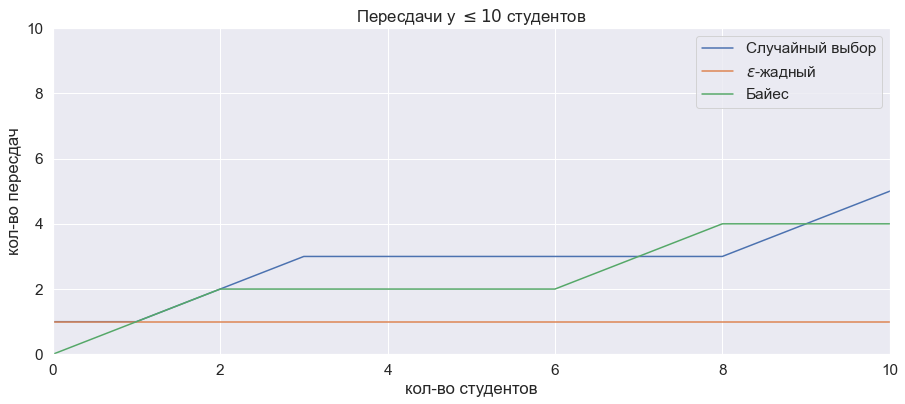

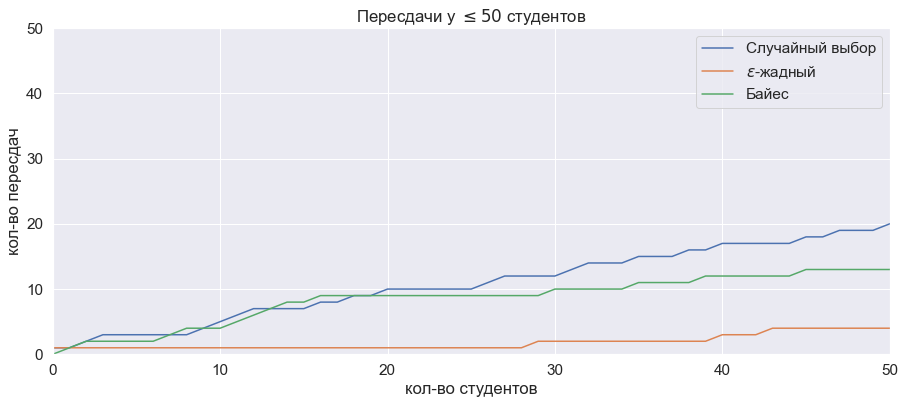

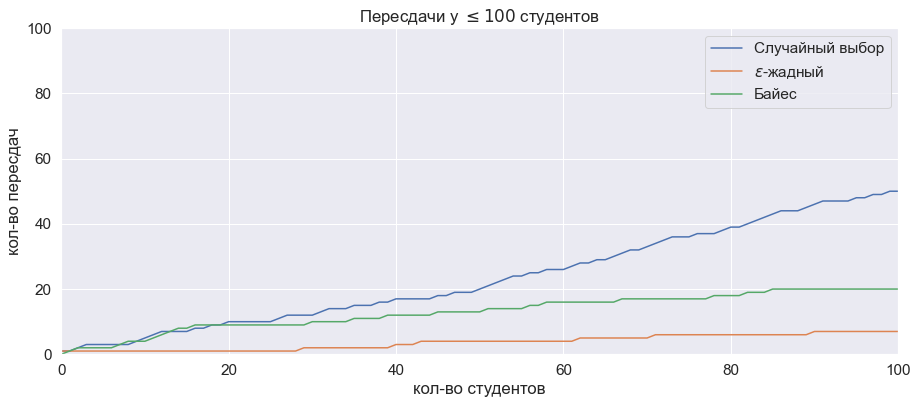

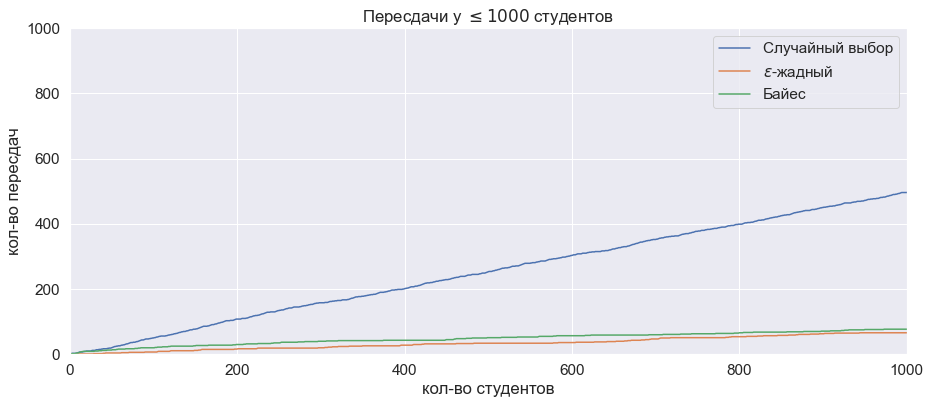

In [16]:
xlims = [10, 50, 100, 1000]
sizes = np.arange(num_students)
for xlim in xlims:
    plt.figure(figsize=(15, 6))
    sns.lineplot(x=sizes, y=cum_retakes_random, label="Случайный выбор")
    sns.lineplot(x=sizes, y=cum_retakes_greedy, label="$\\varepsilon$-жадный")
    sns.lineplot(x=sizes, y=cum_retakes_bayes, label="Байес")
    plt.title(f"Пересдачи у $\leq {xlim}$ студентов")
    plt.xlabel("кол-во студентов")
    plt.ylabel("кол-во пересдач")
    plt.xlim((0, xlim))
    plt.ylim((0, xlim))
    plt.show()

## Задание 3 (Мощность критерия) (10 баллов)

В реальной жизни аналитика самая распространенная задача это A/B-тестирование. Оно применяется практически везде, где это возможно. Идея проста: разбиваем людей на две группы A и B. Группе A мы даем продукт без изменений (принято называть эту группу `placebo`, даже когда речь не идет о медицине), а группе B (`treatment`) мы даем продукт, с каким-то изменением. Мы хотим понять, полезно ли нам предложенное изменение. Поэтому мы считаем какую-то метрику для двух этих групп и пытаемся понять, значимо ли изменение. Однако важный вопрос понять необходимый размер групп A и B.


Давайте представим себе такой случай: студент ведет два паблика с мемами. Один про лектора по статам, а другой про лектора по теории меры. Но наступает сессия, и времени у него остается немного, поэтому он думает о том чтобы закрыть первый паблик, потому что мемы в нем уже не актуальны и лайкают их мало. Вы, как опытный эксперт, можете довольно точно прикинуть распределение лайков под записями. По вашему мнению оба распределения нормальные. Для первого паблика: $\mu_1 = 35$ $\sigma_1 = 30$, для второго: $\mu_2 = 55$ $\sigma_2 = 30$. Считаем, что аудитории пабликов не пересекаются. Вы хотите убедить студента, что ему выгодно закрывать именно первый паблик и сконцентрироваться на втором, но он вам не верит и требует статистически доказать правоту: он требует, чтобы мощность критерия была не менее не менее $0.95$, а уровень значимости $\alpha = 0.05$. Вы предлагаете ему следующий сценарий: чтобы избежать влияние других факторов нужно выкладывать мемы в двух пабликах одновременно раз в день. Необходимо понять сколько дней требуется для подведения итогов.

Введем обозначения для количества лайков: $X$ ~ $N(\mu_1, \sigma^2_1)$; $Y$ ~ $N(\mu_2, \sigma^2_2)$.

Для проверки гиоптезы вы предложили воспользоваться Z-критерием для односторонней альтернативы:

$H_0: \mu_1 = \mu_2$ vs $H_1: \mu_2 > \mu_1$.

Статистика этого критерия выглядит так: $$\dfrac{\overline{Y} - \overline{X}}{\sigma / \sqrt{n}} = \dfrac{\overline{Y}}{\sigma/\sqrt{n}} - \dfrac{\overline{X}}{\sigma / \sqrt{n}}.$$

Напишите функцию которая строит плотности $\overline{X}$ и $\overline{Y}$ в зависимости от $n$ красным и синим цветом соответственно. **Не гистограмму или kde, а именно теоретическую плотность.** Так же закрасьте область соответствующую ошибке первого рода красным ($\alpha$), а ошибке второго рода синим ($\beta$) (`plt.fill_between`). В заголовке напишите мощность критерия ($1 - \beta$).

Должен получится примерно такой график:

![](https://i.ibb.co/m032vj1/Unknown-3.png)



In [17]:
from statsmodels.stats.weightstats import ztest

In [18]:
def plot_power_and_pvalue(
    n: int = 100, 
    mu_1: float = 35, 
    mu_2: float = 55, 
    sigma_1: float = 30, 
    sigma_2: float = 30, 
    alpha: float = 0.05,
    show: bool = True,
):
    assert mu_1 < mu_2
    assert n > 0
    sigma_n_1 = sigma_1 / np.sqrt(n)
    sigma_n_2 = sigma_2 / np.sqrt(n)
    x = np.linspace(-3 * sigma_n_1, mu_2 + 3 * sigma_n_2, 200)
    
    norm_1 = sps.norm(scale=sigma_n_1, loc=mu_1)
    norm_2 = sps.norm(scale=sigma_n_2, loc=mu_2)
    
    x_alpha = norm_1.ppf(1 - alpha)
    
    beta = norm_2.cdf(x_alpha)
    
    pdf_1 = norm_1.pdf(x)
    pdf_2 = norm_2.pdf(x)
    
    sample_1 = norm_1.rvs(size=n)
    sample_2 = norm_2.rvs(size=n)
    
    plt.figure(figsize=(15, 8))
    sns.lineplot(x=x, y=pdf_1, color="red", label="First public")
    sns.lineplot(x=x, y=pdf_2, color="blue", label="Second public")
    
    x_1 = x[x > x_alpha]
    x_2 = x[x <= x_alpha]
    
    plt.fill_between(
        x=x_1,
        y1=np.zeros_like(x_1),
        y2=pdf_1[x > x_alpha],
        color="red",
        alpha=0.3
    )
    
    plt.fill_between(
        x=x_2,
        y1=np.zeros_like(x_2),
        y2=pdf_2[x <= x_alpha],
        color="blue",
        alpha=0.3
    )
    
    plt.vlines(x_alpha, 0, np.max(pdf_1), linestyle="dashed", colors="r", label=f"$\\alpha={alpha}$")
    plt.title(f"z-test power: {1 - beta :.5}")
    plt.legend()

    if show:
        plt.show()
    else:
        plt.close()
    
    return beta

Запустите функцию с параметрами по умолчанию для проверки.

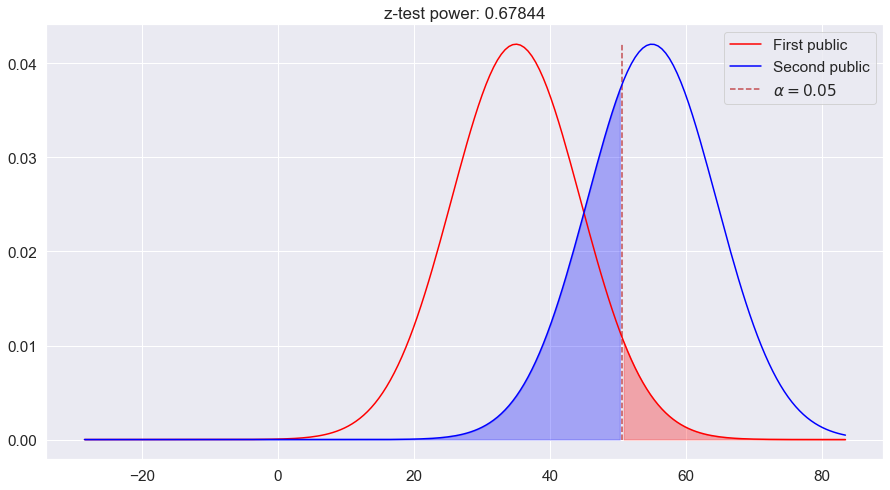

0.3215633923712046

In [19]:
plot_power_and_pvalue(n=10)

Теперь поиграйтесь с ползунком.

In [20]:
from IPython import display
from ipywidgets import interactive

v = interactive(
    lambda n: plot_power_and_pvalue(n), n=(10, 100)
)


In [21]:
display.display(v)

interactive(children=(IntSlider(value=55, description='n', min=10), Output()), _dom_classes=('widget-interact'…

Сколько дней нужно для достижения мощности критерия $\geq 0.95$ на уровне $\alpha=0.05$?

**Ответ:** 25 дней